<a href="https://colab.research.google.com/github/asadali163/Computer-Vision-Projects/blob/main/codebase/CV_image_compression_AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we are going to perform image compression using auto-encoders

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model, Sequential

from tensorflow.keras.datasets import mnist

In [2]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

As we have 60000 images for training and 10000 images for testing.

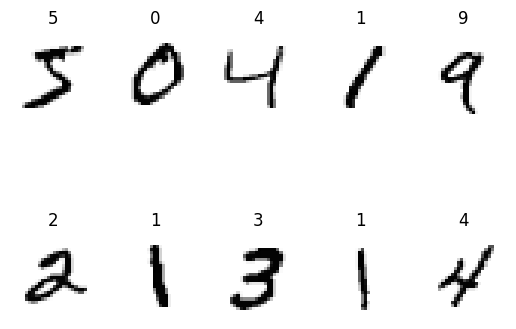

In [4]:
# Let's visualize some of the images
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
  img = X_train[i]
  ax[i].imshow(img, cmap='Greys')
  ax[i].axis('off')
  ax[i].set_title(y_train[i])
plt.show();

As we are going to build linear autoencoders so we need to flatten the images. Because the number of units in the first hidden layer should be equal to the number of pixels of the image

In [5]:
# Let's normalize first
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [6]:
X_train.min(), X_train.max()

(0.0, 1.0)

In [7]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [8]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

Now for auto encoder, we need the following shape
- 784, 128, 64, 32(coded), 64, 128, 784

In [9]:
autoencoder = Sequential()

# Encoder
autoencoder.add(Input(shape=(784,)))
autoencoder.add(Dense(128, activation='relu'))
autoencoder.add(Dense(64, activation='relu'))
autoencoder.add(Dense(32, activation='relu'))

# Decoder
autoencoder.add(Dense(64, activation='relu'))
autoencoder.add(Dense(128, activation='relu'))
autoencoder.add(Dense(784, activation='sigmoid')) # We need sigmoid because we need to predict the value of each pixel

In [10]:
autoencoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
autoencoder.layers[2]

<Dense name=dense_2, built=True>

In [11]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
history = autoencoder.fit(X_train, X_train, epochs=30) # We need to pass X_train for both becasue the input and output both are images

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.0107 - loss: 0.2068
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.0129 - loss: 0.1139
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.0131 - loss: 0.1026
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.0124 - loss: 0.0973
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.0128 - loss: 0.0941
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.0141 - loss: 0.0920
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.0142 - loss: 0.0904
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.0139 - loss: 0.0892
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.0145 - loss: 0.0884
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.0137 - loss: 0.0878
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.0147 - loss: 0.0872
Epoch 12/30
1875/18

Now we will first create the encoder part which in upto the 32 units as earlier discussed

In [13]:
#autoencoder.summary()

In [31]:
autoencoder.get_layer('dense_2')

<Dense name=dense_2, built=True>

In [32]:
autoencoder.inputs

[<KerasTensor shape=(None, 784), dtype=float32, sparse=None, name=keras_tensor>]

In [35]:
encoder = Model(inputs=autoencoder.inputs, outputs=autoencoder.get_layer('dense_2').output)

In [53]:
encoder.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,816 (432.88 KB)

 Trainable params: 110,816 (432.88 KB)

 Non-trainable params: 0 (0.00 B)

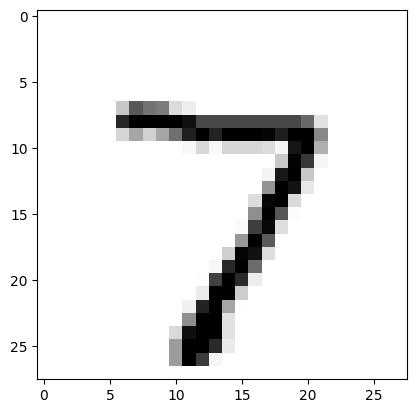

In [36]:
# Let's try the first test image.
test_image = X_test[0]
plt.imshow(test_image.reshape(28, 28), cmap='Greys')
plt.show();

In [37]:
encoded_image = encoder.predict(test_image.reshape(1, -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


In [38]:
encoded_image.shape

(1, 32)

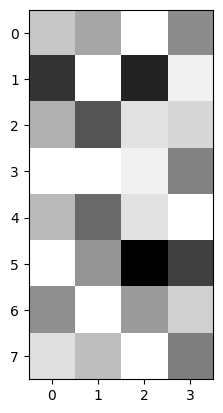

In [39]:
plt.imshow(encoded_image.reshape(8, 4), cmap='Greys')
plt.show();

As you can see the encoded image

Now we will create the decode part. It will start from the inputs of dense_2 layer (32 neurons), and will go to the end.

In [57]:
decoder_input = Input(shape=(32,))
decoder_layer_1 = autoencoder.layers[3]
decoder_layer_2 = autoencoder.layers[4]
decoder_layer_3 = autoencoder.layers[5]
decoder = Model(inputs=decoder_input, outputs=decoder_layer_3(decoder_layer_2(decoder_layer_1(decoder_input))))

In [58]:
decoder.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,568 (435.81 KB)

 Trainable params: 111,568 (435.81 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
encoded_image.shape

(1, 32)

In [60]:
# Let's decode the encoded image
decoded_image = decoder.predict(encoded_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


In [61]:
decoded_image.shape

(1, 784)

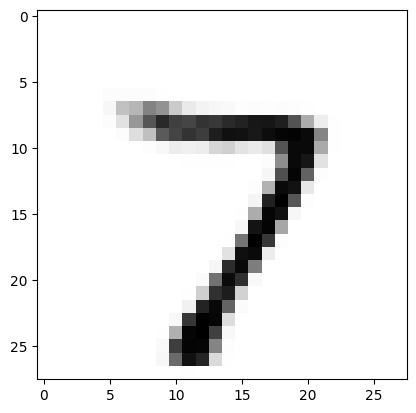

In [62]:
plt.imshow(decoded_image.reshape(28, 28), cmap='Greys')
plt.show();

As you can see the original image was 7 and we have successfully reconstructed it

Let's create a function to take as input image, encode it and then again decode it

In [67]:
def encode_and_decode(image):
  encoded_image = encoder.predict(image.reshape(1, -1))
  decoded_image = decoder.predict(encoded_image)

  # Let's draw all of them and make axes = off
  fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True)
  ax[0].imshow(image.reshape(28, 28), cmap='Greys')
  ax[1].imshow(encoded_image.reshape(8, 4), cmap='Greys')
  ax[2].imshow(decoded_image.reshape(28, 28), cmap='Greys')
  ax[0].set_title('Original Image')
  ax[1].set_title('Encoded Image')
  ax[2].set_title('Decoded Image')
  for i in range(3):
    ax[i].axis('off')
  plt.show();

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


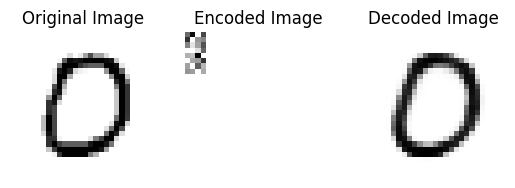

In [68]:
encode_and_decode(X_test[10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


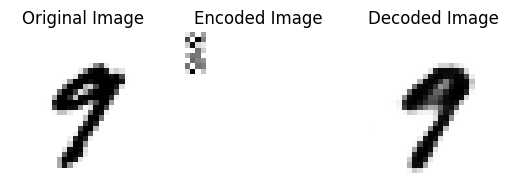

In [69]:
encode_and_decode(X_test[20])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


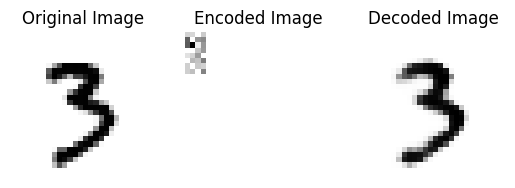

In [70]:
encode_and_decode(X_test[30])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


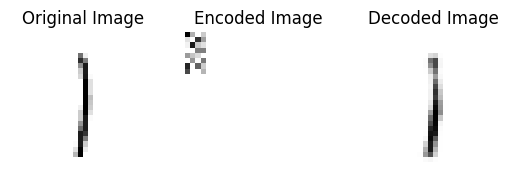

In [71]:
encode_and_decode(X_test[40])

As you can see that the quality is degraded a little bit, but it works fine